# 第十二讲 图和网络

图（Graph）由结点（Node）和边（Edge）组成。

假设现有一张包含 $4$ 个结点 $5$ 条边的图：

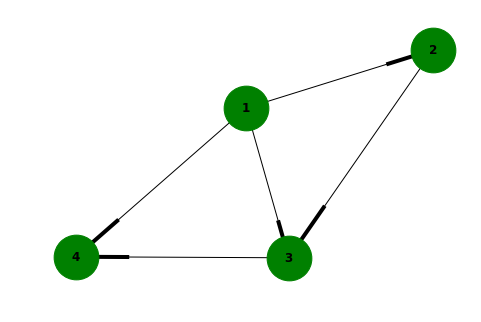

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (2, 3), (1, 3), (3, 4), (1, 4), (3, 4)])

nx.draw(G, with_labels=True, font_weight='bold', node_size=2000, node_color="green")

图对应的边关系如表：
$$\begin{array}{c | c c c c} 
& node_1 & node_2 & node_3 & node_4 \\ 
\hline 
edge_1 & -1     & 1      & 0      & 0      \\ 
edge_2 & 0      & -1     & 1      & 0      \\
edge_3 & -1     & 0      & 1      & 0      \\
edge_4 & -1     & 0      & 0      & 1      \\
edge_5 & 0      & 0      & -1     & 1      \\ 
\end{array} $$

关联矩阵（Incidence Matrix），上图的关联矩阵 $A = \begin{bmatrix} -1 & 1 & 0 & 0 \\ 0 & -1 & 1 & 0 \\ -1 & 0 & 1 & 0 \\ -1 & 0 & 0 & 1 \\ 0 & 0 & -1 & 1\end{bmatrix}$，矩阵的前三行是线性相关的，对应图中的三条边形成回路（Loop）。

引入未知变量 $x$，令 $Ax = 0$，$\begin{bmatrix} -1 & 1 & 0 & 0 \\ 0 & -1 & 1 & 0 \\ -1 & 0 & 1 & 0 \\ -1 & 0 & 0 & 1 \\ 0 & 0 & -1 & 1\end{bmatrix}\begin{bmatrix}x_1 \\ x_2 \\ x_3 \\ x_4\end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 0 \\ 0\end{bmatrix} \Rightarrow \begin{bmatrix}x_2-x_1 \\ x_3-x_2 \\ x_3-x_1 \\ x_4-x_1 \\ x_4 - x_3\end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}$。

考虑图的实际意义，设 $x = [x_1\ x_2\ x_3\ x_4]$ 为结点的电势（Potential），则 $x_2 - x_1$ 可以看作边上的电势差（Potential Difference）。

$x = [1\ 1\ 1\ 1]$ 为 $Ax = 0$ 的一个解，即为等电势的情况。不难发现，$x = [1\ 1\ 1\ 1]$ 即为零空间的一组基。

而对于矩阵 $A$ 的左零空间，它的实际意义就是基尔霍夫电流定律（Kirchoff's Law）。

$$A^Ty = 0 \Rightarrow \begin{bmatrix} -1 & 0 & -1 & -1 & 0\\ 1 & -1 & 0 & 0 & 0 \\ 0 & 1 & 1 & 0 & -1 \\ 0 & 0 & 0 & 1 & 1\end{bmatrix}\begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5\end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} \Rightarrow \left\{\begin{matrix}y_1 + y_3 + y_4 & = 0\\ y_1 - y_2 & = 0 \\ y_2 + y_3 - y_5 &=0 \\ y_4 + y_5 & =0\end{matrix}\right.$$

解得 $N(A^T)$ 的一组基：$\begin{bmatrix}1\\1\\-1\\0\\0\end{bmatrix},\begin{bmatrix}0\\0\\1\\-1\\1\end{bmatrix}$，而左零空间中的基，对应的即为图中的回路。相反，如果矩阵 $A^T$ 中的列向量线性无关，说明图中没有存在回路，没有回路的图也称为树（Tree）。


当 $A^T$ 中的列向量线性无关时，秩 $r = n - 1 = nodes - 1$，而左零空间的维数就是相互无关的回路的数量，$dimN(A^T) = m - r = edges - (nodes - 1)$，该公式适用于所有图，也称欧拉公式（Euler's Formula）。可以理解称一个树只有结点数减一的边，那么多出来的每条边均会形成一个回路。
